In [2]:
import cv2 
import os 
import glob
import numpy as np

import matplotlib.pyplot as plt 

from tqdm import tqdm 
from module.utils import imread
from module.disp_measure import convert_by_img

In [3]:
img_list = glob.glob(os.path.join(r'C:\Users\shdik\UOS-SSaS Dropbox\02. Projects\2019 NIA 인공지능기반 시설물 스마트 모니터링 체계 구축\2020.08.14 변위탐지모듈 파이썬변환', 'P34_9', '*.jpg'))

In [3]:
## check the circle detection accuracy 

param1 = 100
param2 = 16
min_rad = 30
max_rad = 40
img = imread(img_list[670]) 
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret3, th3 = cv2.threshold(grey_img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

circles = cv2.HoughCircles(th3, 
                               cv2.HOUGH_GRADIENT,
                               1, 
                               20, 
                               param1=param1,
                               param2=param2,
                               minRadius=min_rad,
                               maxRadius=max_rad)

# Draw circles that are detected. 
if circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    circles = np.uint16(np.around(circles)) 
  
    for pt in circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(th3, (a, b), r, (0, 255, 0), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(th3, (a, b), 1, (0, 0, 255), 3) 
        cv2.imshow("Detected Circle", th3) 
        cv2.waitKey(0) 
else:
        cv2.imshow('Circle is not detected', th3)
        cv2.waitKey(0) 

In [4]:
result = [] 
src_img = imread(img_list[0])

for img_path in tqdm(img_list): 
    dest_img = imread(img_path)
    result.append(convert_by_img(dest_img,
                                 src_img,
                                 min_rad = 30,
                                 max_rad = 40,
                                 param1 = 100,
                                 param2 = 15))

  0%|▏                                                                                 | 2/843 [00:00<01:58,  7.11it/s]

[[ 954.5  718.5   37.6]
 [1046.5  622.5   38.3]
 [ 953.5  624.5   38.3]
 [1047.5  716.5   37.7]
 [ 298.5  984.5   31.6]]
[(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 3, 4), (0, 2, 3, 4), (1, 2, 3, 4)]


  1%|▊                                                                                 | 8/843 [00:01<01:50,  7.54it/s]

[[1053.5  717.5   37.7]
 [1051.5  622.5   38.1]
 [ 960.5  720.5   38.3]
 [ 956.5  626.5   39.4]
 [1481.5  381.5   30.4]]
[(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 3, 4), (0, 2, 3, 4), (1, 2, 3, 4)]


  1%|█                                                                                | 11/843 [00:01<02:00,  6.92it/s]

[[1038.5  717.5   37.7]
 [1037.5  623.5   38.3]
 [ 943.5  628.5   37.2]
 [ 943.5  721.5   37.2]
 [1712.5  513.5   35. ]]
[(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 3, 4), (0, 2, 3, 4), (1, 2, 3, 4)]


  2%|█▏                                                                               | 13/843 [00:01<02:12,  6.29it/s]

[[ 937.5  721.5   37.4]
 [ 935.5  626.5   38. ]
 [1029.5  623.5   37.7]
 [1031.5  717.5   38. ]
 [ 914.5  363.5   33.8]]
[(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 3, 4), (0, 2, 3, 4), (1, 2, 3, 4)]


  2%|█▋                                                                               | 17/843 [00:02<02:03,  6.70it/s]

[[1040.5  716.5   37.1]
 [1038.5  622.5   37.7]
 [ 947.5  719.5   37.9]
 [ 945.5  626.5   37.1]
 [ 570.5 1009.5   36. ]]
[(0, 1, 2, 3), (0, 1, 2, 4), (0, 1, 3, 4), (0, 2, 3, 4), (1, 2, 3, 4)]


  3%|██▌                                                                              | 27/843 [00:04<02:11,  6.21it/s]


KeyboardInterrupt: 

In [5]:
collect_rslt = []
for rslt in result : 
    collect_rslt.append(rslt[0])

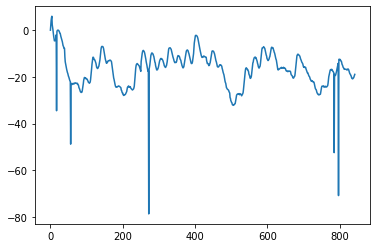

In [6]:
plt.plot(np.array(collect_rslt))

In [9]:
np.savetxt("P34_7.csv", np.array(collect_rslt), delimiter=",")